Import the dataset.

[Click here for the dataset](https://www.kaggle.com/uciml/iris)

In [411]:
import pandas as pd

dataset = pd.read_csv('/content/Iris.csv')

In [412]:
x = dataset.drop(columns=["Species"])

In [413]:
y = dataset["Species"]

In [414]:
y = pd.get_dummies(y, columns=['Species'])


In [415]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


Split the data into a training set and a testing set.

In [416]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [417]:
y_train

,Iris-setosa,Iris-versicolor,Iris-virginica
98,0,1,0
61,0,1,0
59,0,1,0
110,0,0,1
86,0,1,0
...,...,...,...
55,0,1,0
124,0,0,1
16,1,0,0
131,0,0,1


Build and train the model.

In [418]:
import tensorflow as tf

In [419]:
training_set_shape = x_train.shape
print(training_set_shape)

(120, 5)


In [420]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='categorical_crossentropy', optimizer=optimizer)

  return model

In [421]:
y_train, x_train

(     Iris-setosa  Iris-versicolor  Iris-virginica
 98             0                1               0
 61             0                1               0
 59             0                1               0
 110            0                0               1
 86             0                1               0
 ..           ...              ...             ...
 55             0                1               0
 124            0                0               1
 16             1                0               0
 131            0                0               1
 123            0                0               1
 
 [120 rows x 3 columns],
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 98    99            5.1           2.5            3.0           1.1
 61    62            5.9           3.0            4.2           1.5
 59    60            5.2           2.7            3.9           1.4
 110  111            6.5           3.2            5.1           2.0
 86    87            

In [422]:
tfmodel = build_model()
history = tfmodel.fit(x_train, y_train, epochs=70)

Epoch 1/70
4/4 [==============================] - 0s 4ms/step - loss: 8.3768
Epoch 2/70
4/4 [==============================] - 0s 5ms/step - loss: 2.5923
Epoch 3/70
4/4 [==============================] - 0s 7ms/step - loss: 3.1797
Epoch 4/70
4/4 [==============================] - 0s 3ms/step - loss: 2.3941
Epoch 5/70
4/4 [==============================] - 0s 3ms/step - loss: 1.5587
Epoch 6/70
4/4 [==============================] - 0s 3ms/step - loss: 1.4711
Epoch 7/70
4/4 [==============================] - 0s 4ms/step - loss: 1.2989
Epoch 8/70
4/4 [==============================] - 0s 3ms/step - loss: 1.1745
Epoch 9/70
4/4 [==============================] - 0s 3ms/step - loss: 1.0390
Epoch 10/70
4/4 [==============================] - 0s 4ms/step - loss: 0.8946
Epoch 11/70
4/4 [==============================] - 0s 4ms/step - loss: 0.8743
Epoch 12/70
4/4 [==============================] - 0s 4ms/step - loss: 0.8023
Epoch 13/70
4/4 [==============================] - 0s 4ms/step - loss: 0.

Evaluate the model.

In [423]:
tfmodel.evaluate(x_test, y_test)

1/1 [==============================] - 0s 113ms/step - loss: 0.1443


0.14426705241203308

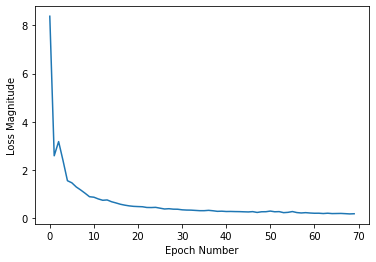

In [424]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [425]:
tfmodel.predict(x_test[:3])

array([[1.3432025e-04, 4.0764880e-01, 5.9221685e-01],
       [2.1502688e-05, 1.5618582e-01, 8.4379268e-01],
       [9.9996662e-01, 3.3427128e-05, 4.2045347e-08]], dtype=float32)

In [426]:
y_test[:3]

,Iris-setosa,Iris-versicolor,Iris-virginica
100,0,0,1
115,0,0,1
0,1,0,0
